## Libraries

In [36]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

AttributeError: module 'matplotlib.pyplot' has no attribute 'ggplot'

## Making list of all csv files 

In [14]:
# changing our current directory where our csv files are saved
os.chdir("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data")

# only choosing files with .csv extension
extension = 'csv'

all_filenames = [i for i in glob.glob('*_2019.csv')]

# if we have not set this to current directory, then we have to pass all the files:
# Another way: all_filenames = [i for i in glob.glob("E:\Pandas-Sales-Analysis\SalesAnalysis\Sales_Data\January_2019.csv")]

all_filenames

['April_2019.csv',
 'August_2019.csv',
 'December_2019.csv',
 'February_2019.csv',
 'January_2019.csv',
 'July_2019.csv',
 'June_2019.csv',
 'March_2019.csv',
 'May_2019.csv',
 'November_2019.csv',
 'October_2019.csv',
 'September_2019.csv']

## Merging 12 months data into single csv file

In [15]:
# Initialising empty data frame to store 12 months data
all_data = pd.DataFrame()

for f in all_filenames:
    df = pd.read_csv(f) 
   
    all_data = pd.concat([all_data,df])
    # pd.concat([ 1. df: where to concatenate into, 2. df which you want to add in first data frame ])

# changing a data frame to csv file using .to_csv
all_data.to_csv( "combined_data.csv", index=False)
# dataframe_name.to_csv('csv_file_name')

print("Size of merged data frame: ",all_data.shape)

all_data.shape

Size of merged data frame:  (186849, 6)


(186849, 6)

# Cleaning or data

## Columns with missing values

In [16]:
missing_values = all_data.isna().any()
missing_values

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

## Rows with missing values

In [17]:
missing_val_2 = all_data[all_data.isnull().any(axis=1)]
missing_val_2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


## Number of rows with mising values 

In [18]:
rows,columns = missing_val_2.shape
rows

544

## Deleting only those rows which are totally NAN 

In [19]:
all_data.dropna(axis=0,how='all',inplace=True)

## Checking NAN values  

In [20]:
check_nan = all_data.isnull().any()
check_nan

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

# Converting Order Date(string datatype) to DateTime format
## gives ParserError: Unknown string format: Order Date

In [21]:
all_data['month'] = pd.to_datetime(all_data['Order Date'])

ParserError: Unknown string format: Order Date

## There is still some problematic rows, we have to clean them. 

In [22]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data['month'].sample(20)

13941    03
2916     11
5074     06
3219     03
414      11
14928    12
3084     07
5862     09
25079    12
4936     04
8732     04
16345    10
3928     06
5279     10
9418     12
18727    12
2585     07
4483     11
13787    10
5772     03
Name: month, dtype: object

## There is presence of string 'Or' in month column, we have to clean it 
## That's why we were facing errors

In [23]:
all_data['month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

# Cleaning Data - 2
## Removing 'Or' from month column

In [24]:
# Only putting those rows which doesn't contain 'Or' in month section
all_data = all_data[~all_data['month'].str.contains("Or")]
# Putting ~ works as an invert

# Another way: all_data = all_data[all_data['Month'].str[0:] != "Or"]

In [25]:
all_data['month'].str.contains("Or").any()

False

## Converting datatype of columns

In [26]:
all_data['month'] = all_data['month'].astype('int32')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

# What was the best month for sales?

## Calculating total sales  

In [33]:
# Making a total_sales column
all_data['total_sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
val = all_data.groupby(['month']).agg({'total_sales':'sum'})
val.round(2)

,total_sales
month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [34]:
all_data.sample(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,total_sales
18830,277315,Lightning Charging Cable,1,14.95,10/30/19 09:23,"843 Main St, Atlanta, GA 30301",10,14.95
19293,277754,Wired Headphones,1,11.99,10/27/19 17:40,"721 River St, San Francisco, CA 94016",10,11.99
825,223702,USB-C Charging Cable,1,11.95,07/01/19 19:28,"627 Johnson St, Atlanta, GA 30301",7,11.95
11591,270424,Vareebadd Phone,1,400.00,10/27/19 06:31,"183 Washington St, New York City, NY 10001",10,400.00
9294,170885,ThinkPad Laptop,1,999.99,03/25/19 08:32,"37 5th St, Portland, OR 97035",3,999.99
1785,142933,ThinkPad Laptop,1,999.99,01/30/19 17:54,"918 5th St, Dallas, TX 75001",1,999.99
6288,168005,27in 4K Gaming Monitor,1,389.99,03/13/19 12:22,"396 Center St, Los Angeles, CA 90001",3,389.99


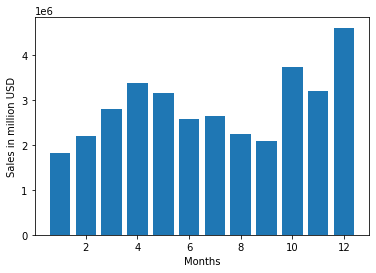

In [44]:
months = [month for month,data in all_data.groupby(['month'])]
# Method2: months = range(1,13)

plt.bar(months,val['total_sales'])
plt.xlabel('Months')
plt.ylabel('Sales in million USD')
plt.show()

## It is clearly visible from above bar chart month of december has highest sales